<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Overview</a></span></li><li><span><a href="#Business-Challenge" data-toc-modified-id="Business-Challenge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Challenge</a></span></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Investigating-Correlations-with-Response-Variable" data-toc-modified-id="Investigating-Correlations-with-Response-Variable-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigating Correlations with Response Variable</a></span></li><li><span><a href="#Feature-Engineering---Time-between-signup-and-enrollment" data-toc-modified-id="Feature-Engineering---Time-between-signup-and-enrollment-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Engineering - Time between signup and enrollment</a></span></li><li><span><a href="#Feature-Engineering---Screens-Accessed" data-toc-modified-id="Feature-Engineering---Screens-Accessed-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Engineering - Screens Accessed</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Creating-Train/Test-Splits" data-toc-modified-id="Creating-Train/Test-Splits-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Creating Train/Test Splits</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Feature Scaling</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Presenting-Final-Results" data-toc-modified-id="Presenting-Final-Results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Presenting Final Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Project Overview

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, include YouTube Red, Pandora Premium, Audible Subscription and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with their offers and promotions.

- **Market:** The target audience is customers who use a company's free product. For this project, this refers to users who installed (and used) the company's free mobile app.
- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, YouTube Red allows you to leave the app while still listening to a video.
- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.

# Business Challenge

The data comes from a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked. 

We will identify which users will most likely **NOT** enroll in a paid product, so that additional offers can be given to them. Due to the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

# Data Overview

We have access to the each customer's app behaviour data. This data allows us to see the date and time of app installation, as well as the features the user engaged with in the app. App behaviour is characterised as the list of app screens the user looked at and whether the user played the financial mini-games available. 

The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features and the company wants to target them with new offers shortly after the trial is over.

The data fields  we'll be working with are as follows:

- `first_open`: The datetime when the user first opened the app
- `dayofweek`: the integer day of the week when the user first opened the app. Starts at 0, which is Sunday and runs to 6 which is Saturday. 
- `hour`: Hour of the day when user first opened app. in 24 hours format as 18:00:00. Correlates with `dayofweek`.
- `age`: Age of the user.
- `screen_list`: Comma-seperated list of screens that the users accessed in their first 24 hours.
- `numscreens`: The number of screens accessed in their first 24 hours.
- `liked`: Each screen has an feature to 'like' that particualr screen. If any screens are liked, this value will be 1, otherwise 0.
- `minigame`: 1 if the user played the mini-game, 0 otherwise.
- `used_premium_feature`: 1 if the user accessed any of the premium features in the first 24 hours, 0 otherwise.
- `enrolled`: 1 if the user enrolled, 0 otherwise. This is the field that will be predicted later.
- `enrolled_date`: If the user enrolled at any time, this value is popopulated with the date of enrollment.

# Data Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
df = pd.read_csv('data/appdata10.csv')

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


Let's convert hour to a numerical value.

In [6]:
df["hour"] = df.hour.str.slice(1, 3).astype(int)

In [7]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df2 = df.copy().drop(['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'], axis=1)

In [9]:
df2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Histograms

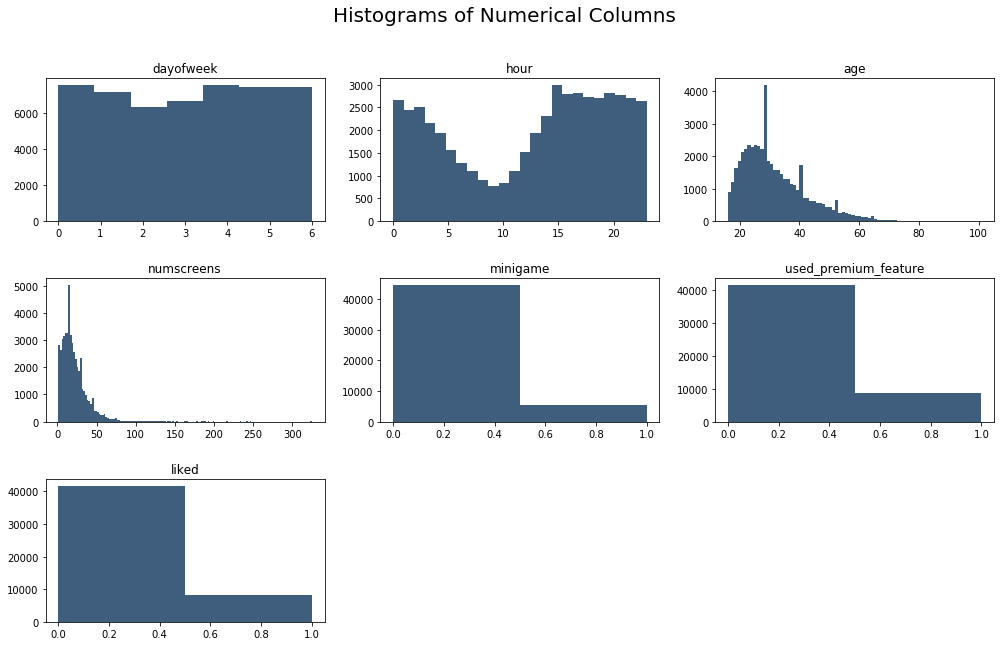

In [10]:
plt.figure(figsize=(17,10))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df2.columns.values[i-1])
    
    # determine the number of unique values in each column
    vals = np.size(df2.iloc[:, i-1].unique())
    # number of bins equals the number of unique values for each column
    plt.hist(df2.iloc[:, i-1], bins=vals, color='#3F5D7D')

plt.subplots_adjust(hspace=0.4)    

Findings:

- Not a huge preference singing up on a specific day.
- Hour is in UTC time so the major dip we see represents sleeping time for most people.  
- Most signups tends to be from younger people (right-skewed age) with a few big spikes around 30, 40 and 50. 
- A few outliers access a large number of screens but generally most people access less than 25 screens.
- Most people do not play the mini game or use premium features. 
- Most people have not liked any of the app features. 

# Investigating Correlations with Response Variable

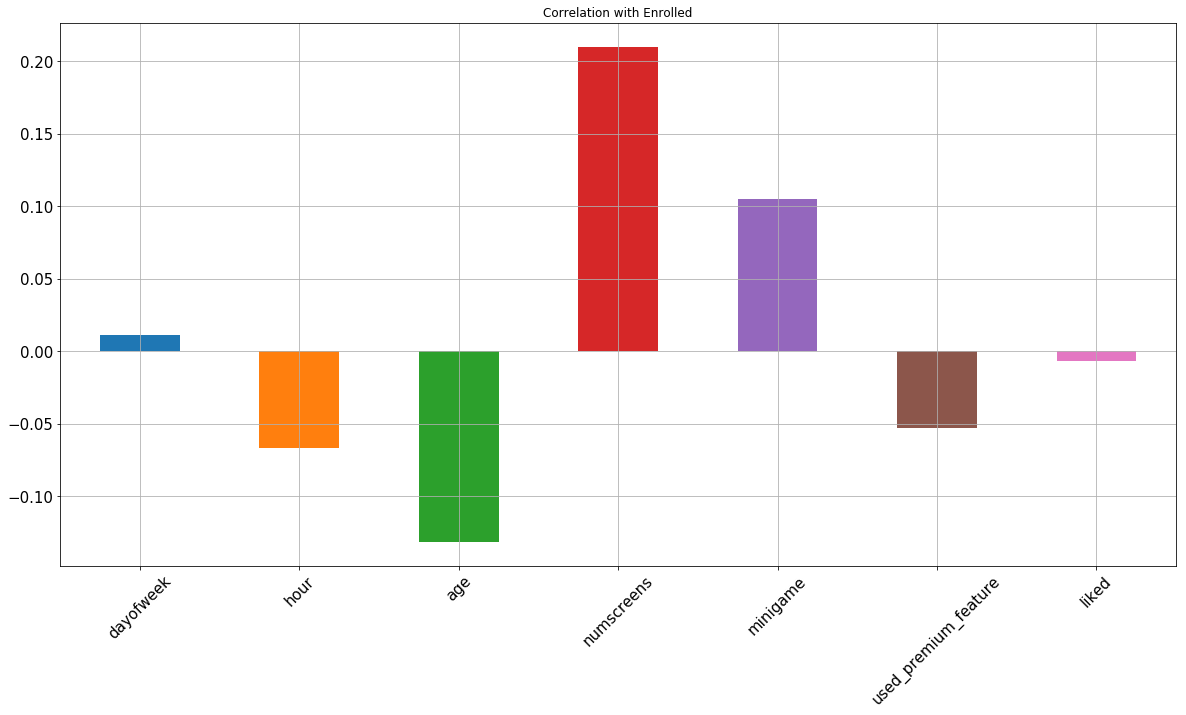

In [11]:
df2.corrwith(df.enrolled).plot.bar(figsize=(20, 10), 
                                  title='Correlation with Enrolled',
                                 fontsize=15, 
                                 rot=45, grid=True)

Findings:

- Older people tend to sign up less.
- The more screens someone used, the more likely they are to sign up.
- People playing the mini-game tend to sign up, however it's a weak poositive correlation.
- People who use the app at earlier hours tend to sign up less, however it's a very weak naegative correlation.
- The more people use premium features, the less likely they are to enrol, however it's a very weak negative correlation.
- Whether users like a feature or not seems to have no correlation on whether they sign up or not. 

Let's plpot a correlation matrix to see if there are dependencies between the variables.

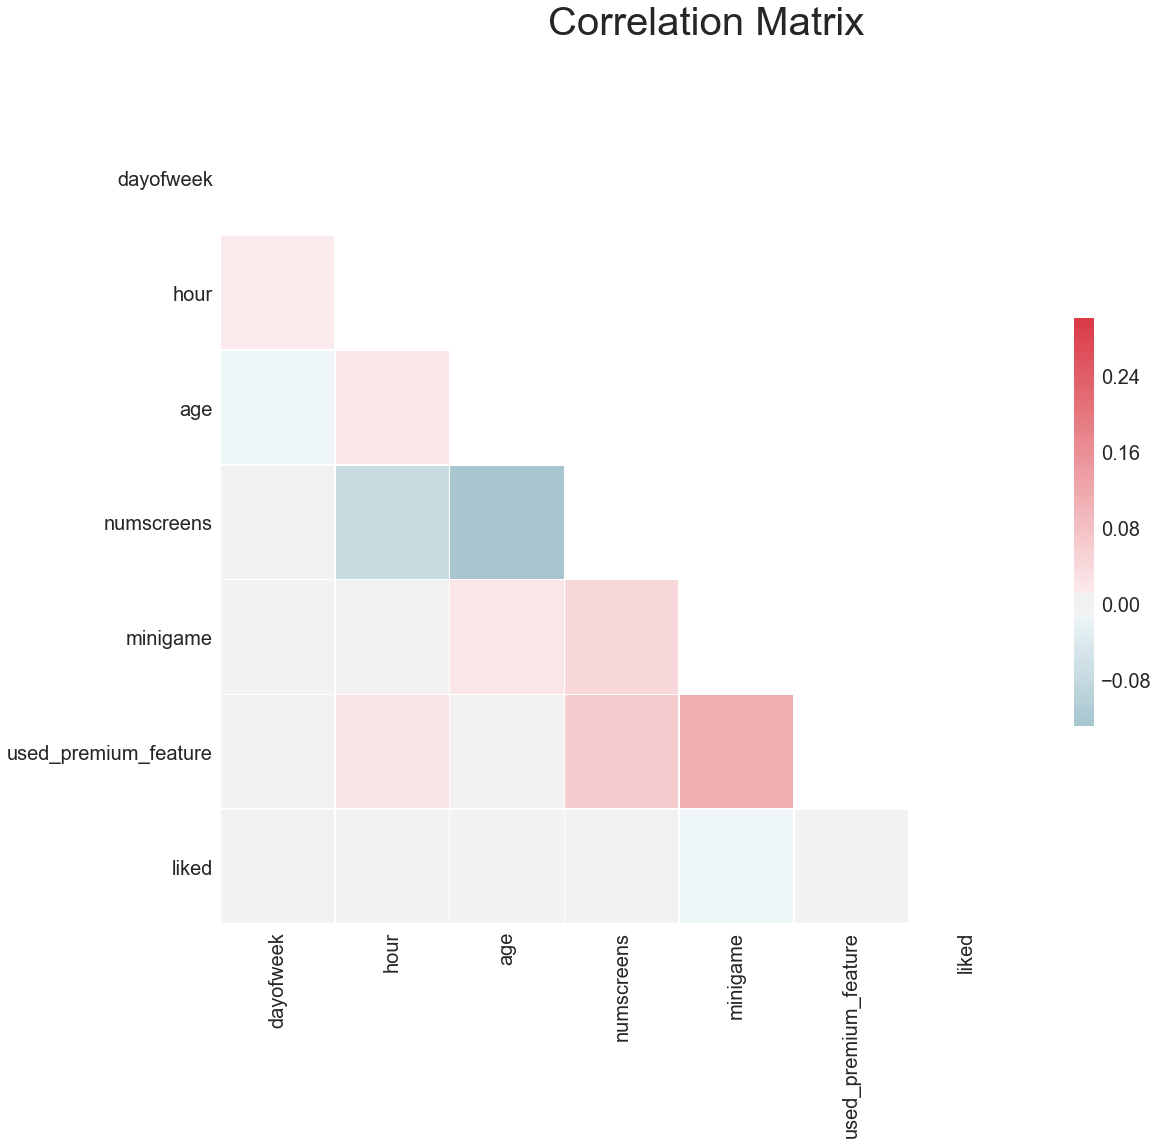

In [12]:
sns.set(style='white', font_scale=2)
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (18, 15))
f.suptitle('Correlation Matrix', fontsize=40)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

No strong correlations between variables. Older people may access less screen and the more screens a person accesses the more likely they are to use a premium feature. If they play a mini-game they are more likely to use a premium feature as well.  

# Feature Engineering - Time between signup and enrollment

In [13]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

We need to conver `first_open` and `enrolled_date` to datetime's so we can calculate the difference in hours between them.

In [14]:
df['first_open'] = pd.to_datetime(df.first_open)
df['enrolled_date'] = pd.to_datetime(df.enrolled_date)

In [15]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [16]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [17]:
# find the timedelta in hours between the dates
df["difference"] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [18]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


Now let's investigate the distrubtion of `difference` so we can understand how quickly most users sign up.

Text(0.5,1,'Most users who sign up do so within the first 500 hours of app usage')

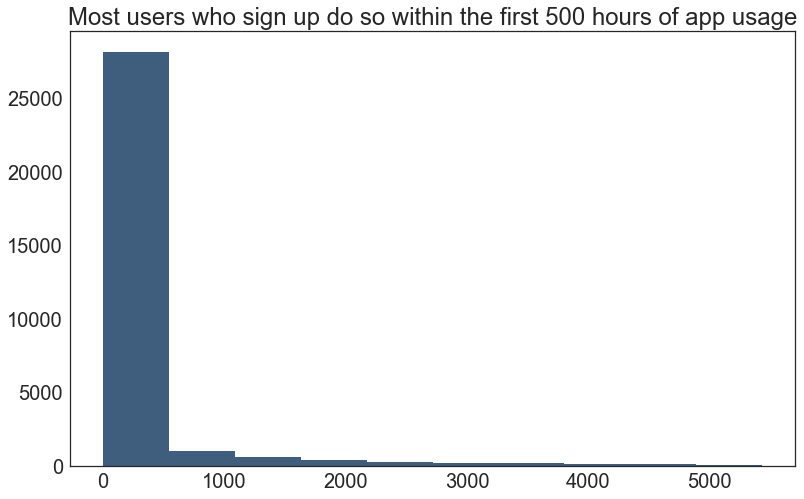

In [19]:
plt.figure(figsize=(13, 8))
plt.hist(df['difference'].dropna(), color='#3F5D7D')
plt.title('Most users who sign up do so within the first 500 hours of app usage')

It seems that most users who do sign up, do so within the first 500 hours. However we could check within this first 500 hours for a more specific breakdown.

Text(0.5,1,'Most signups occur within first 10 hours of usage')

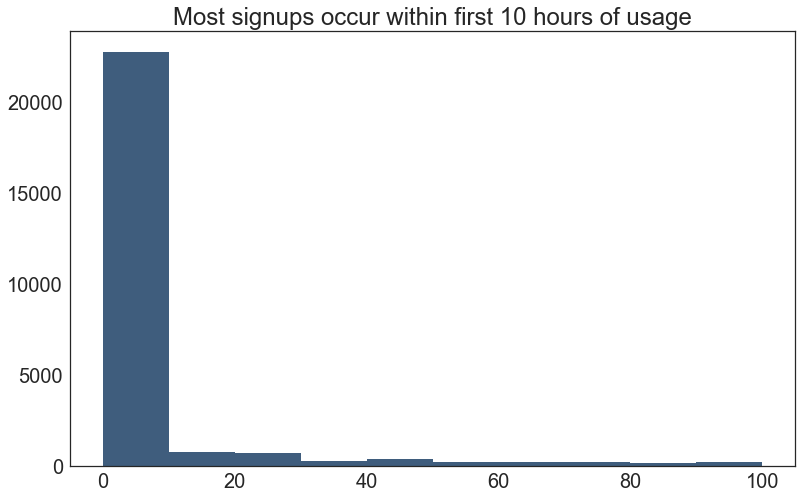

In [20]:
plt.figure(figsize=(13, 8))
plt.hist(df['difference'].dropna(), color='#3F5D7D', range=[0, 100])
plt.title('Most signups occur within first 10 hours of usage')

It looks like most signups actually happen within the first 10 hours. Let's break it down further. 

Text(0.5,1,'Most signups occur within first hour of usage')

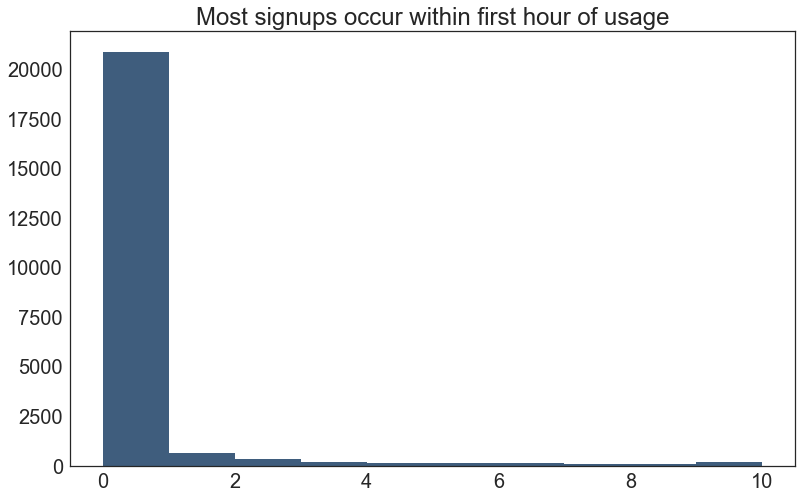

In [21]:
plt.figure(figsize=(13, 8))
plt.hist(df['difference'].dropna(), color='#3F5D7D', range=[0, 10])
plt.title('Most signups occur within first hour of usage')

It looks like the first hour of usuage is where most users decided whether to sign up or not. 

For modelling purposes, let's limit our data to those they have enrolled within 2 days of usage since after that we are creating a very skewed set in the repsonse variable which isnt ideal for modelling.

In [22]:
df.loc[df.difference > 48, 'enrolled'] = 0

We'll drop the columns we no longer need

In [23]:
df = df.drop(['difference', 'enrolled_date', 'first_open'], axis=1)

# Feature Engineering - Screens Accessed

We need to convert the comma-seperated list of screens accessed into a format suitable for modelling.

`top_screens.csv` is provided by the company and shows the top screen accessed by each user. We can use this to limit the number of columns that are generated to only those that represent the top-accessed screens. Doing this reduces the number of features generated.

We want to create a set of dummy variables for the top screens, i.e. if the user has accecssed a partciualr top screen, make it a 1, otherwise 0. Then create an 'Other" field which maintains a could of the other non-top screens they also accessed.

In [64]:
top_screens = pd.read_csv('data/top_screens.csv')

In [65]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [66]:
top_screens = top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [67]:
df['screen_list'] = df.screen_list.astype(str) + ','

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',', '')
    
df["other"] = df.screen_list.str.count(',')

AttributeError: 'DataFrame' object has no attribute 'screen_list'

In [68]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,10,0,2,0,1


In [69]:
df = df.drop(['screen_list'], axis=1)

KeyError: "['screen_list'] not found in axis"

Now let's group related screens to the same funnel. We do this to remove the correlation that exists between various screens from the same funnel. Doing so will improve our model.

First the screens related to savings. 

In [30]:
savings_screens = [
    "Saving1",
    "Saving2",
    "Saving2Amount",
    "Saving4",
    "Saving5",
    "Saving6",
    "Saving7",
    "Saving8",
    "Saving9",
    "Saving10",
]

df["savings_count"] = df[savings_screens].sum(axis=1)

In [31]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [32]:
df = df.drop(savings_screens, axis=1)

In [33]:
cm_screens = [
    "Credit1",
    "Credit2",
    "Credit3",
    "Credit3Container",
    "Credit3Dashboard",
]

df["cm_count"] = df[cm_screens].sum(axis=1)
df = df.drop(cm_screens, axis=1)

In [34]:
cc_screens = [
    "CC1",
    "CC1Category",
    "CC3"
]

df["cc_count"] = df[cc_screens].sum(axis=1)
df = df.drop(cc_screens, axis=1)

In [35]:
loan_screens = [
    "Loan",
    "Loan2",
    "Loan3",
    "Loan4"
]

df["loan_count"] = df[loan_screens].sum(axis=1)
df = df.drop(loan_screens, axis=1)

In [36]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [37]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'savings_count', 'cm_count', 'cc_count', 'loan_count'],
      dtype='object')

In [38]:
df.to_csv('data/new_appdata10.csv', index=False)

# Data Preprocessing

## Creating Train/Test Splits

In [70]:
df = pd.read_csv('data/new_appdata10.csv')

In [71]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [72]:
df.shape

(50000, 50)

In [73]:
import time

In [74]:
#  creating target
response = df.enrolled
#print(response)

In [75]:
# removing target from data
df = df.drop(['enrolled'], axis=1)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.2, random_state=0)


In [77]:
train_identifier = X_train['user']
X_train = X_train.drop('user', axis=1)

In [78]:
test_identifier = X_test['user']
X_test = X_test.drop('user', axis=1)

## Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values, index=X_train.index.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values, index=X_test.index.values)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [82]:
X_train_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [83]:
X_test_scaled.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
11841,-1.489818,-1.553579,0.856728,0.819520,-0.34683,-0.457453,2.246319,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
19602,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800
45519,-1.489818,0.328622,0.487305,-0.644744,-0.34683,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,0.057524,-0.289185,1.785389
25747,0.972325,0.866394,-0.990390,-0.517417,-0.34683,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,-0.763372,-0.289185,-1.165789
42642,0.972325,-1.553579,-0.159187,0.692193,-0.34683,-0.457453,-0.445173,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,1.857638,-0.763372,2.962372,-1.165789


# Model Building

In [84]:
print(y_train)

20330    0
17532    0
45819    0
34807    0
31888    1
48372    1
5524     1
38032    1
14944    0
22793    1
13779    1
35417    0
27299    0
2268     0
9262     0
11828    0
25890    1
9426     1
10027    1
17424    0
41906    0
6011     0
26614    1
29088    1
5388     1
10799    1
10005    1
28917    0
47797    1
35615    0
        ..
7877     1
37619    1
5072     0
2163     0
38804    0
6921     1
38984    1
27469    0
16921    1
35665    1
24152    0
43095    1
18983    0
32230    0
17089    0
14650    1
39512    0
48600    1
15430    0
14935    0
46884    0
20757    1
41993    1
32103    0
30403    0
21243    0
45891    0
42613    0
43567    0
2732     1
Name: enrolled, Length: 40000, dtype: int64


In [85]:
from sklearn.linear_model import LogisticRegression

Lasso regularization will be used to strongly penalise any variable that is strongly correlated with the target variable. For example, if a payment screen always proceeds the final enrollment thank you screen, then these highly correlated screens might skew the model.

In [88]:
clf = LogisticRegression(random_state=0, penalty='l1', solver='saga')

In [89]:
clf.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
y_pred = clf.predict(X_test_scaled)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3886 1186]
 [1133 3795]]


Test data accuracy: 0.7681


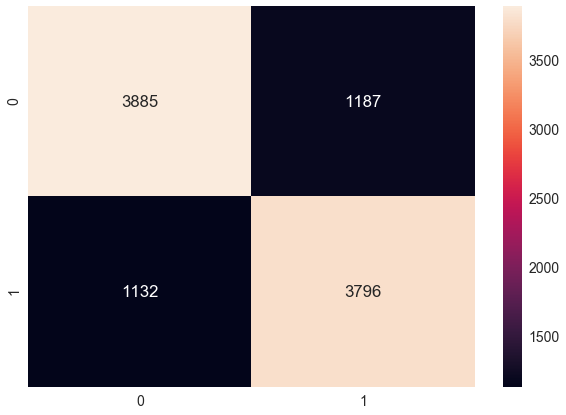

In [90]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred)))

A lot of type 1 and type 2 errors, model needs improvement.

In [78]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77      5072
          1       0.76      0.77      0.77      4928

avg / total       0.77      0.77      0.77     10000



In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
acc = cross_val_score(clf, X_train_scaled, y_train, cv=10)

In [97]:
print("Logistic Accuracy: {:0.3f} (+/- {:0.3f} std. dev)".format(acc.mean(), acc.std()))

Logistic Accuracy: 0.767 (+/- 0.005 std. dev)


# Presenting Final Results

In [99]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()

In [101]:
final_results['predicted'] = y_pred

In [106]:
final_results = final_results[['user', 'enrolled', 'predicted']].reset_index(drop=True)

In [107]:
final_results

,user,enrolled,predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


# Conclusion

Our efforts have given us a model that will label every new user as "highly likely" or "unlikely" to subscribe. We can further validate our results by running our predictions on daily new installs and see whether our accuracy is consistant. From there, we can narrow our marketing efforts only for those users who are "unlikely" to subscribe and thus increase our subscriber rate.

The increase in overall subscriptions can measure the benefit of this model to the company. Recall that those already likely to subscribe will do so and although we can still give them offers, we don't have to go all out. On the other hand, users who are likely to leave may convert to paid subscribers if we give them an offer they cannot refuse. 

For example, these offers could come in the form of "1st free month" or 50% off yearly subscriptions. The latter shows that great offers can still be structured in a way that brings overall benefit to the company because we are locking the user in for an extended period.